# В соответствии с вариантом задания сгенерировать экспериментальные данные, в которых в явном виде присутствует эффект мультиколлинеарности.
# Регрессия на 8 факторах. Эффект мультиколлинеарности создают две пары факторов. Имеется разброс в масштабах факторов.

# x1 = x2 + x8

# Так же разброс факторов:

# x1 [-4; 4]

# x2 [-3.5; 3.5]

# x3 [-3; 3]

# x4 [-2.5; 2.5]

# x5 [-2; 2]

# x6 [-1.5; 1.5]

# x7 [-1; 1]

# x8 [-0.5; 0.5]

In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

Теперь задаём кол-во экспериментов и кол-во фактор + значение параметров в модели

In [2]:
n = 300 # Кол-во экспериментов
m = 8 # Кол-во факторов
teta = np.ones((m+1,1)) # +1 свободный член

Сама наша модель

In [3]:
def calc_u(x, teta):
 return x @ teta

Генерация массива признаков

In [4]:
x2 = np.random.uniform(-3.5, 3.5, n)
x3 = np.random.uniform(-3, 3, n)
x4 = np.random.uniform(-2.5, 2.5, n)
x5 = np.random.uniform(-2, 2, n)
x6 = np.random.uniform(-1.5, 1.5, n)
x7 = np.random.uniform(-1, 1, n)
x8 = np.random.uniform(-0.5, 0.5, n)

e_milty = np.random.normal(0, 0.1, n) #Что бы не было точной линеной зависимости добавляю ошибку
x1 = x2 + x8  + e_milty# Линейная зависимость от 2ух параметров

x0 = np.ones(n) # Свободный член
x = pd.DataFrame({'C' : x0,
                  'x1': x1,
                  'x2': x2,
                  'x3': x3,
                  'x4': x4,
                  'x5': x5,
                  'x6': x6,
                  'x7': x7,
                  'x8': x8})
df = x.copy()


Генерация значения сигнала

In [5]:
u = calc_u(x, teta)
df['u'] = u
df['u']

0      4.800731
1     -8.515474
2      8.400764
3      8.802570
4     -3.518128
         ...   
295   -5.063626
296   -3.198618
297   -0.301919
298   -1.551219
299    2.273839
Name: u, Length: 300, dtype: float64

Генерация значения отклика модели

In [6]:
p = 0.05 # мощность сигнала
u_avr = u.sum() / n
w_sq = ((u - u_avr).T @ (u - u_avr) / (n-1))[0][0]
d = w_sq * p
e = np.random.normal(0, d, (1, n)).T
y = u + e
df['y'] = y
df

,C,x1,x2,x3,x4,x5,x6,x7,x8,u,y
0,1.0,-0.587017,-0.404738,2.825136,0.666209,1.431949,-0.014524,-0.030663,-0.085623,4.800731,4.004194
1,1.0,-2.156394,-1.887345,-2.892198,-1.758673,-1.854320,0.664674,0.625320,-0.256537,-8.515474,-8.412420
2,1.0,3.267975,3.176515,-2.234389,1.324666,1.118663,-0.341213,0.749000,0.339547,8.400764,9.043539
3,1.0,3.264206,2.806457,-0.052035,0.261475,-0.489141,0.681875,0.991096,0.338636,8.802570,10.346031
4,1.0,-1.206642,-0.629845,-0.767768,1.435810,-0.480605,-1.491637,-0.892766,-0.484676,-3.518128,-3.277878
...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,-2.861437,-2.930093,2.719643,-0.489678,-0.987496,-0.884416,-0.593036,-0.037115,-5.063626,-4.211234
296,1.0,-1.059412,-1.452059,0.319249,-2.189048,0.006623,-1.016089,0.829008,0.363110,-3.198618,-3.933442
297,1.0,-1.807383,-2.021731,1.674402,0.130549,-1.030121,0.626971,0.892761,0.232633,-0.301919,-0.162112
298,1.0,-0.285390,-0.473973,0.090984,-0.186206,-1.343529,0.558759,-0.881297,-0.030568,-1.551219,1.614023


# Рассчитать ряд показателей, характеризующих эффект мультиколлинеарности. Определить факторы, ответственные за возникновение эффекта мультиколлинеарности.

Сначала посчитаем определитель Информационной матрицы нормированной на её след

In [7]:
x

,C,x1,x2,x3,x4,x5,x6,x7,x8
0,1.0,-0.587017,-0.404738,2.825136,0.666209,1.431949,-0.014524,-0.030663,-0.085623
1,1.0,-2.156394,-1.887345,-2.892198,-1.758673,-1.854320,0.664674,0.625320,-0.256537
2,1.0,3.267975,3.176515,-2.234389,1.324666,1.118663,-0.341213,0.749000,0.339547
3,1.0,3.264206,2.806457,-0.052035,0.261475,-0.489141,0.681875,0.991096,0.338636
4,1.0,-1.206642,-0.629845,-0.767768,1.435810,-0.480605,-1.491637,-0.892766,-0.484676
...,...,...,...,...,...,...,...,...,...
295,1.0,-2.861437,-2.930093,2.719643,-0.489678,-0.987496,-0.884416,-0.593036,-0.037115
296,1.0,-1.059412,-1.452059,0.319249,-2.189048,0.006623,-1.016089,0.829008,0.363110
297,1.0,-1.807383,-2.021731,1.674402,0.130549,-1.030121,0.626971,0.892761,0.232633
298,1.0,-0.285390,-0.473973,0.090984,-0.186206,-1.343529,0.558759,-0.881297,-0.030568


In [8]:
info_x = x.T @ x
tr = np.trace(info_x)
print(tr)
info_x

5051.052784341986


,C,x1,x2,x3,x4,x5,x6,x7,x8
C,300.000000,-19.514392,-20.120308,-47.380700,-9.624247,12.554970,-6.176485,-13.871809,-2.792888
x1,-19.514392,1220.779718,1175.286950,90.152198,-30.711486,48.471292,-42.686650,20.207343,45.160062
x2,-20.120308,1175.286950,1156.318180,71.702841,-34.445885,51.627697,-47.164612,14.359607,21.636838
x3,-47.380700,90.152198,71.702841,993.364405,-34.151350,-15.415458,14.694785,34.991293,12.584835
x4,-9.624247,-30.711486,-34.445885,-34.151350,619.739932,-35.478360,13.110637,2.226587,6.104095
x5,12.554970,48.471292,51.627697,-15.415458,-35.478360,418.092003,-27.785228,-4.493943,-4.570671
x6,-6.176485,-42.686650,-47.164612,14.694785,13.110637,-27.785228,217.159130,-3.731312,2.762661
x7,-13.871809,20.207343,14.359607,34.991293,2.226587,-4.493943,-3.731312,101.939596,6.921039
x8,-2.792888,45.160062,21.636838,12.584835,6.104095,-4.570671,2.762661,6.921039,23.659820


Если определитель матрицы близок к нулю, то минимальное собственное значение тоже близко к нулю, а это значит, что матрица близка к вырожденной. Что говорит нам о наличии эффекта мультиколлиарности

In [9]:
info_norm_x = info_x / tr
det = np.linalg.det(info_norm_x)
det

5.868126389572479e-14

А теперь посчитаем минимальное собственное значение. Чем оно меньше тем сильнее эффект мультиколлиарности

In [10]:
l, v = np.linalg.eig(info_norm_x) # Находим собственные значения и собственные вектора
lmin = min(l)
index_lmin = np.where(l == lmin)
print(v[index_lmin])
lmax = max(l)
print("\nМинимальное собственное число: " + str(lmin)) 
print("\nМаксимальное собственное число: " + str(lmax)) 

[[-0.01206894  0.03761618  0.01262529 -0.01237007 -0.05364528 -0.04223649
   0.99140408  0.00757301 -0.10259534]]

Минимальное собственное число: 0.0001965080141419652

Максимальное собственное число: 0.4714423067796276


Вообще тут какие-то приколы пошлиЮ значения не особо сходятся (у тех, которые точно от 0 отличны с теми которые на самом деле входят в мультиколлиарность)

Мера обусловленности матрицы по Нейману-Голдстейну. Сравнивая эту меру с масштабом (опираясь на масштабы измерения факторов) можно судить о наличии или об отсутствии мультиколлиарности

In [11]:
print("\nМера обусловленности по Нейману-Голдстейну: " + str(lmax/lmin))


Мера обусловленности по Нейману-Голдстейну: 2399.099644043214


Максимальная парная сопряжённость - по идеи она расчитывается на основе similarity cosine (близость по косинусной метрике)

In [12]:
cosine_sim_x = cosine_similarity(info_x)
cosine_sim_x

array([[ 1.        , -0.10936706, -0.10809035, -0.21185607, -0.03416385,
         0.06394979, -0.03626842, -0.23362431, -0.17216382],
       [-0.10936706,  1.        ,  0.999785  ,  0.16771637, -0.09611315,
         0.19359915, -0.30088194,  0.24842074,  0.83843716],
       [-0.10809035,  0.999785  ,  1.        ,  0.15783596, -0.09879418,
         0.1973901 , -0.30566591,  0.24143031,  0.82724763],
       [-0.21185607,  0.16771637,  0.15783596,  1.        , -0.09431993,
        -0.03198725,  0.04676465,  0.37327355,  0.3223496 ],
       [-0.03416385, -0.09611315, -0.09879418, -0.09431993,  1.        ,
        -0.15054234,  0.10126407, -0.00597921,  0.04451103],
       [ 0.06394979,  0.19359915,  0.1973901 , -0.03198725, -0.15054234,
         1.        , -0.23446102, -0.02799154,  0.02969228],
       [-0.03626842, -0.30088194, -0.30566591,  0.04676465,  0.10126407,
        -0.23446102,  1.        , -0.07643596, -0.14339678],
       [-0.23362431,  0.24842074,  0.24143031,  0.37327355, -0

In [13]:
mask = np.ones(cosine_sim_x.shape, dtype=bool) # маска для поиска максимального значения
np.fill_diagonal(mask, 0) # заполняю диагональ нулями
max_r = cosine_sim_x[mask].max()
print("\nМаксимальная парная сопряженность: " + "\t" + str(max_r))


Максимальная парная сопряженность: 	0.9997850028037475


а тут прям бинго! (2,8) - максимум!

Теперь посчитаем максимальную сопряжённость

In [14]:
Rii = np.diagonal(np.linalg.inv(cosine_sim_x))
R = 1 - Rii ** (-1)
max_R = R.max()
print("Максимальная сопряженность: " + "\t" + str(max_R) +"\n")
R

Максимальная сопряженность: 	0.9999989484891743



array([0.815841  , 0.99999895, 0.99999888, 0.93279478, 0.65066598,
       0.52729709, 0.52869516, 0.51788582, 0.99916682])

Ну и напоследок: Определитель корреляционной матрицы

Когда гамма = 1, то тут точняк мультикорреляция!!!

In [15]:
info_x_cor = np.corrcoef(info_x)
det_i_x_c = np.linalg.det(info_x_cor)
gamma = 1 - abs(det_i_x_c)
print(gamma)

1.0


Примечание:

 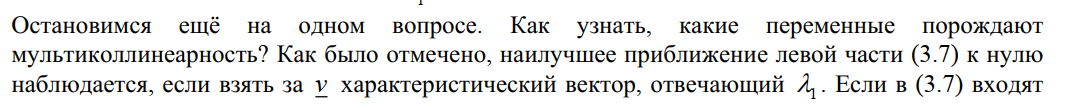

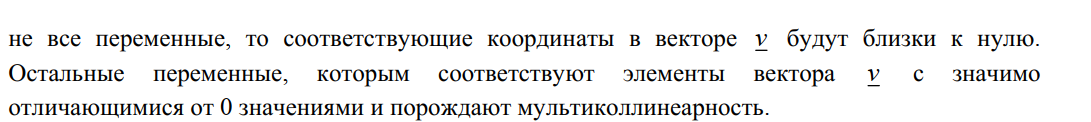

# Построить ридж-оценки параметров при различных значениях параметра регуляризации. Выбрать оптимальное значение параметра регуляризации. Построить графики изменения квадрата евклидовой нормы оценок параметров и остаточной суммы квадратов от параметра регуляризации

In [17]:
lyamda = 0 # Параматр регуляризации
step = 0.01 # Шаг
ar_lyam = [] # Параметры регуляризации
RSS = [] # Остаточные суммы квадратов
beta = [] # Квадраты евклидовой нормы
while lyamda < 0.1:
    D = np.diag(np.diagonal(info_x)) # Для вычисления нормы евклидова
    sq_D = np.sqrt(D)
    Z = x @ np.linalg.inv(sq_D) # Хз, вроде лишнее

    L = lyamda * D  # Вроде матрица сдвига или регуляризации
    teta_tilda = np.linalg.inv(info_x + L) @ x.T @ y # оценка параметров
    y_tilda = np.array(x) @ teta_tilda # Предсказание отклика
    RSS_cur = (y-y_tilda).T @ (y-y_tilda) # Остаточная сумма квадратов
    RSS.append(RSS_cur[0][0]) 
    cur_beta = np.linalg.norm(sq_D @ teta_tilda) # Текущая норма Евклида
    beta.append(cur_beta)
    ar_lyam.append(lyamda)
    lyamda += step
print(RSS_cur.shape)
RSS, min(beta), max(beta), beta[-1]
print(cur_beta)

(1, 1)
66.0624156376223


Построим соответствующие графики

Сначала для RSS(lyamda)

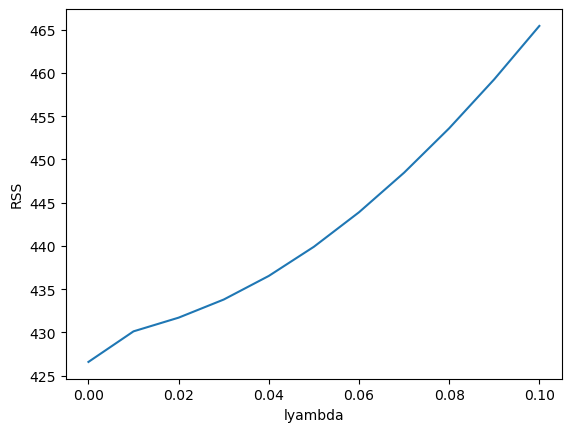

In [18]:
plt.plot(ar_lyam, RSS)
plt.xlabel('lyambda')
plt.ylabel('RSS')
plt.show()

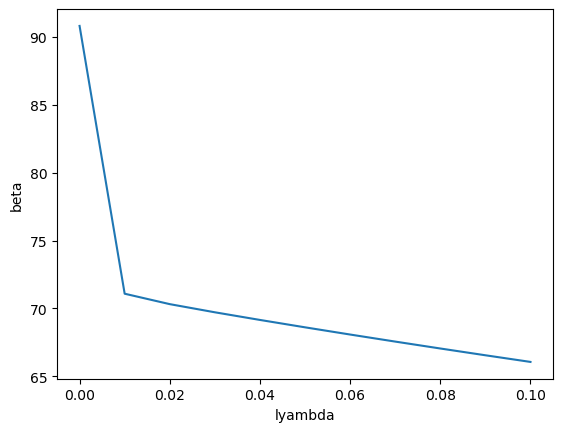

In [19]:
plt.plot(ar_lyam, beta)
plt.xlabel('lyambda')
plt.ylabel('beta')
plt.show()

Оптимальный параметр выбирается на глаз Ну тут при каждом запуске разные будут получаться графики, но то что я вижу - примерно 0.02 - норм параметр

 # Провести оценивание модели регрессии по методу главных компонентов. Перейти к описанию в исходном пространстве факторов. Сравнить решение с ридж-оцениванием по смещению оценок и точности предсказания отклика. функция от модуля взаимодействия первого и второго факторов. 

In [20]:
#получим х со звездочкой(центрированные переменные)
means = x.mean()
X_star = np.array([x['C'] - means['C'],
        x['x1'] - means['x1'], 
        x['x2'] - means['x2'], 
        x['x3'] - means['x3'], 
        x['x4'] - means['x4'], 
        x['x5'] - means['x5'], 
        x['x6'] - means['x6'], 
        x['x7'] - means['x7'], 
        x['x8'] - means['x8']])
X_star


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.52196899, -2.09134621,  3.33302261, ..., -1.74233499,
        -0.22034232,  2.3888966 ],
       [-0.33767024, -1.82027775,  3.24358282, ..., -1.95466303,
        -0.40690512,  2.61590838],
       ...,
       [ 0.00606462,  0.68526206, -0.32062481, ...,  0.64755895,
         0.57934699, -1.18204727],
       [ 0.01557633,  0.67155957,  0.79523976, ...,  0.93900068,
        -0.83505733,  0.14275946],
       [-0.07631297, -0.24722733,  0.34885658, ...,  0.24194232,
        -0.02125795, -0.20539455]])

In [21]:
#получим у со звездочкой
y_star = np.reshape(np.array([y - np.mean(y)]), (n, ))
y_star

array([ 3.27217852e+00, -9.14443492e+00,  8.31152433e+00,  9.61401613e+00,
       -4.00989308e+00,  3.12217349e+00, -5.74301744e+00,  9.10747525e+00,
        3.36550709e+00, -6.71882200e+00,  6.54825537e+00,  3.32249218e+00,
       -1.13583126e+01, -6.63926156e+00, -5.67984275e+00,  6.19288336e+00,
        4.85878269e+00,  4.06090610e+00,  5.52992478e+00,  1.15770032e+01,
        8.27207913e+00, -1.26588753e+00, -7.57612774e-01, -4.04193726e+00,
       -2.91309768e+00,  9.55731109e+00, -3.84731492e+00,  4.92672556e-01,
       -9.78204718e+00, -4.76444822e+00,  1.39228399e+00,  6.95267940e+00,
        3.12742256e+00, -2.39196548e+00,  4.20773256e-01,  7.25244031e+00,
        3.00444210e+00, -7.75417405e+00, -6.42592273e+00, -1.96387221e+00,
       -5.53042423e+00,  5.14237889e+00, -5.58413308e+00,  5.07435607e+00,
       -9.92900842e+00, -7.40655488e+00, -3.12036186e+00, -3.38317448e+00,
       -5.12882355e+00, -6.71842847e+00,  8.87348874e-01,  1.15351142e+01,
        3.89411252e+00, -

**ВНИМАНИЕ** в следующем коде может присутствовать ошибка, а именно, я ориентировалась в том числе на бригаду Насти Хабаровой, а они в Z умножали на матрицу Х, хотя вроде в лекции написано Х*V, вот, не уверена, что здесь правильно, вероятно я где-то запуталась 

In [22]:
cov_mat = np.cov(X_star)#наша ковариационная матрица
cov_values, cov_vectors = np.linalg.eig(cov_mat)#1 - массив с собств значениями ков матрицы, 2 - матрица, сод собств векторы
Z = x.values @ cov_vectors#матрица значений главных компонент(если что, если тут подставлять X_star - то не подойдет, а если X_star транпс, то то же самое) 
cov_values

array([7.95186782e+00, 3.28459203e+00, 2.08003379e+00, 1.37558803e+00,
       3.31979121e-03, 1.11052675e-01, 3.35778788e-01, 7.08342731e-01,
       0.00000000e+00])

In [23]:
#уберем значения некоторые
Z_new = np.delete(Z, (6, 7, 8), axis=1)#удаляем значения последние три столбца из Z 
cov_vectors_new = np.delete(cov_vectors, (6, 7, 8), axis=1)# удаляем три столбца из V 
b = np.linalg.inv((Z_new.T @ Z_new)) @ (Z_new.T @ y_star)# высчитываем вектор b 
theta_hat = cov_vectors_new @ b 
print(f"Вектор коэффициентов регресии для исходных факторов: {theta_hat}") 
norm_theta_hat = theta_hat.T @ theta_hat 
print(f"Норма этого вектора: {norm_theta_hat}") 

Вектор коэффициентов регресии для исходных факторов: [ 0.          0.11205805  1.82994413  1.00383567  1.08303594  0.84243984
 -0.10481365 -0.03886421  1.79831571]
Норма этого вектора: 9.498046006268712
